# Project: CoDoctor

- Name: Dhanu Sree Suresh
- Aim: To predict disease based on symptoms inputed by the user

In [1]:
#If libraries not installed, run this cell
!pip install numpy
!pip install scipy
!pip install keras
!pip install pandas
!pip install seaborn
!pip install tabulate
!pip install matplotlib
!pip install scikit-learn
!pip install gradio

  Using cached protobuf-3.19.6-cp37-cp37m-win_amd64.whl (896 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [1]:
#Importing required libraries
import time
import json
import keras
import urllib3
import numpy as np
import gradio as gr
import pandas as pd
import seaborn as sns
from sklearn import tree
import ttkbootstrap as tb
from sklearn.svm import SVC
from scipy.stats import mode
from tabulate import tabulate
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from ttkbootstrap.constants import  *
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score, mean_squared_error

In [2]:
#Reading the dataset
DF = pd.read_csv("Diseases.csv")

In [3]:
%%time
DF.to_csv("Diseases.csv.zip", compression = 'gzip', index = False)

Wall time: 471 ms


In [4]:
#Compressing and using dataset to prevent corruption of program
df = pd.read_csv("Diseases.csv.zip", compression = 'gzip')

In [5]:
#Displays information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [6]:
#Displays basic statistical details about the DataFrame
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Displays first 5 rows from the dataset
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [8]:
#Displays all the columns available in the dataset
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)

In [9]:
#Displays the amount of null values in the columns 
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [10]:
#To display the diseases and their frequency in the dataset
df.prognosis.value_counts()

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

# Label Encoding

- Assignment of a number for each category (categorical values to numeric values)
- Reason: Machine learning models can only work with numerical values

In [11]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])
x = df[['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain','stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue','weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat','irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption','fluid_overload_1','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling','silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze']]
y = df['prognosis']

In [12]:
#Printing the data points of each category to check if it has been changed to numbers
print(df['prognosis'].value_counts())

15    122
20    121
22    121
3     121
36    121
10    121
34    121
13    121
18    121
39    121
26    121
24    121
25    121
31    121
5     121
0     121
2     121
38    121
35    121
21    121
19    121
4     121
40    121
16    121
9     121
14    121
33    121
1     121
12    121
17    121
6     121
23    121
30    121
7     121
32    121
28    121
29    121
8     121
11    121
37    121
27    121
Name: prognosis, dtype: int64


In [13]:
# Printing the first 5 rows of x and y to make sure the data is correct
print(x.head())
print(y.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0    

In [14]:
x_values = df[['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain','stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue','weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat','irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption','fluid_overload_1','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling','silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze','prognosis']]
y_values = df['prognosis']

In [15]:
pro = df['prognosis']
dis = ['Fungal infection', 'Hepatitis C', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia','Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthritis', 'Arthritis', '(vertigo) ParoymsalPositional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Hepatitis D', 'Hepatitis B', 'Allergy', 'Hepatitis A', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer disease', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue','Typhoid', 'Impetigo']
i = []
for j in pro:
    if j not in i:
        i.append(j)

d = pd.Series(dis,index = i).to_dict()
print(json.dumps(d,indent=2))

{
  "15": "Fungal infection",
  "4": "Hepatitis C",
  "16": "Hepatitis E",
  "9": "Alcoholic hepatitis",
  "14": "Tuberculosis",
  "33": "Common Cold",
  "1": "Pneumonia",
  "12": "Dimorphic hemmorhoids(piles)",
  "17": "Heart attack",
  "6": "Varicose veins",
  "23": "Hypothyroidism",
  "30": "Hyperthyroidism",
  "7": "Hypoglycemia",
  "32": "Osteoarthritis",
  "28": "Arthritis",
  "29": "(vertigo) ParoymsalPositional Vertigo",
  "8": "Acne",
  "11": "Urinary tract infection",
  "37": "Psoriasis",
  "40": "Hepatitis D",
  "19": "Hepatitis B",
  "20": "Allergy",
  "21": "Hepatitis A",
  "22": "GERD",
  "3": "Chronic cholestasis",
  "36": "Drug Reaction",
  "10": "Peptic ulcer disease",
  "34": "AIDS",
  "13": "Diabetes",
  "18": "Gastroenteritis",
  "39": "Bronchial Asthma",
  "26": "Hypertension",
  "24": "Migraine",
  "25": "Cervical spondylosis",
  "31": "Paralysis (brain hemorrhage)",
  "5": "Jaundice",
  "0": "Malaria",
  "2": "Chicken pox",
  "38": "Dengue",
  "35": "Typhoid",
  

# Splitting

In [16]:
#Splitting data for testing and training (30% data for test set)
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.3, random_state = 10)

# Standardisation

- standardising/normalising the data to scale values for all variables into similar ranges
- makes data consistent, standard form therefore easier to understand and used
- makes data more navigable

In [17]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# Modelling

### Learning Based Approach
- AI modelling where machine learns by itself
- AI model gets trained on the data fed to it and is able to design a model adaptive to the change in data
- supervised learning models used in this project:
    - works on labelled data
        - label: information used as tag for data
    - features: data that can be used to predict the target or label
    - classification: 
        - data classified according to labels
        - works on discrete datasets (data need not be continuous)
    - Regression:
        - works on continuous data

## KNN (K-Nearest Neighbours)

- can be used in classification or regression problems
- relies on surrounding points (neighbours) to determine it group
    - k is the number of neighbours 

In [18]:
#Creating lists to store accuracy and number of neighbours for each KNN Model
kaccuracy = []
num_neigh = []

In [19]:
#Cycling through values 1 to 15 (These are the number of neighbours for the KNN Classifier)
for i in range(1,16):
    #Setting the number of neighbours to i
    KNN = KNeighborsClassifier(n_neighbors=i)
    #Training the model with the data
    KNN.fit(x_train_scale,y_train)
    #.score provides the accuracy of the model based on the testing data
    kaccuracy.append(KNN.score(x_test_scale,y_test))
    #Adding the number of neighbours to the list
    num_neigh.append(i)    
print(kaccuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735]


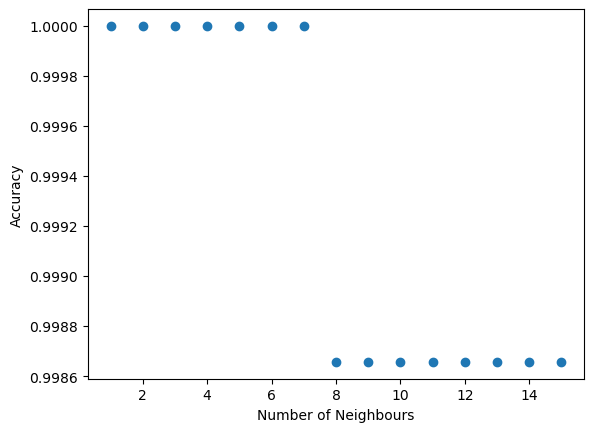

In [20]:
#Printing visual representation of the accuracy values to decide optimal number of neighbours
plt.scatter(num_neigh,kaccuracy)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()
#The optimal number of neighbours decided by the lowest number of neighbours having highest accuracy value

In [21]:
#Training KNN algorithim with dataset
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN = KNN.fit(x_train_scale, y_train)

In [22]:
#Evaluating performance of the model
y_predict1 = KNN.predict(x_test_scale)

In [23]:
#Confusion Matrix to evaluate model outputs
print(confusion_matrix(y_test, y_predict1))

[[36  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 38]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

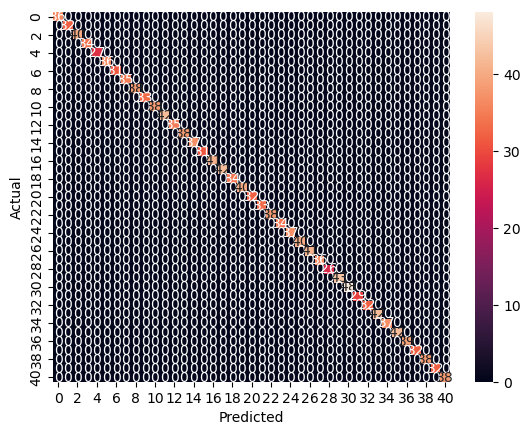

In [24]:
#Confusion Matrix using Heatmap for better understanding
df2 = pd.DataFrame()
df2['Actual'] = y_test
df2['Predicted'] = y_predict1

#Couting frequency in actual and predicted
freq = pd.crosstab(df2.Actual, df2.Predicted)

#Plotting Heatmap
sns.heatmap(freq, annot = True, fmt = 'd')

In [25]:
#KNN Model Accuracy
KNacc = accuracy_score(y_test, y_predict1)
print("KNN Model Accuracy:", KNacc*100)

KNN Model Accuracy: 100.0


In [26]:
a1 = []
p1 = []
for i in df2['Actual']:
    a1.append(d[i])
for j in df2['Predicted']:
    p1.append(d[j])

In [27]:
k = pd.DataFrame(list(zip(a1, p1)))
kcolumns = ['Actual', 'Predicted']

In [28]:
print(tabulate(k, kcolumns, tablefmt = 'fancy_grid'))

╒══════╤═══════════════════════════════════════╤═══════════════════════════════════════╕
│      │ Actual                                │ Predicted                             │
╞══════╪═══════════════════════════════════════╪═══════════════════════════════════════╡
│    0 │ Pneumonia                             │ Pneumonia                             │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    1 │ Hyperthyroidism                       │ Hyperthyroidism                       │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    2 │ Chronic cholestasis                   │ Chronic cholestasis                   │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    3 │ Acne                                  │ Acne                                  │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    4 │ Alcoholic he

In [29]:
#to get details about the function
help(tabulate)

Help on function tabulate in module tabulate:

tabulate(tabular_data, headers=(), tablefmt='simple', floatfmt='g', intfmt='', numalign='default', stralign='default', missingval='', showindex='default', disable_numparse=False, colalign=None, maxcolwidths=None, rowalign=None, maxheadercolwidths=None)
    Format a fixed width table for pretty printing.
    
    >>> print(tabulate([[1, 2.34], [-56, "8.999"], ["2", "10001"]]))
    ---  ---------
      1      2.34
    -56      8.999
      2  10001
    ---  ---------
    
    The first required argument (`tabular_data`) can be a
    list-of-lists (or another iterable of iterables), a list of named
    tuples, a dictionary of iterables, an iterable of dictionaries,
    an iterable of dataclasses (Python 3.7+), a two-dimensional NumPy array,
    NumPy record array, or a Pandas' dataframe.
    
    
    Table headers
    -------------
    
    To print nice column headers, supply the second argument (`headers`):
    
      - `headers` can be an 

## Decision Tree

- can be used in classification or regression problems
- starts from the root (point where decision tree starts), diverges into multiple directions (branches) and in the end, the final decision is where the tree ends (leaves)

In [30]:
#To decide the maximum depth of the tree
taccuracy = []
depth = []

#Cycling through values 1 to 60 (These will be the max_depth for the decision tree)
for i in range(1,61):
    #Setting max_depth to i
    dt = tree.DecisionTreeClassifier(max_depth = i)
    #Training the model with the data
    dt.fit(x_train_scale,y_train)
    #.score provides the accuracy of the model based on the testing data
    taccuracy.append(dt.score(x_test_scale, y_test))
    #Adding the max_depth to the list
    depth.append(i)
print(taccuracy)

[0.03425117528542646, 0.052384150436534584, 0.07051712558764271, 0.11282740094022835, 0.18334452652787106, 0.2310275352585628, 0.277367360644728, 0.2995298858294157, 0.34519811954331764, 0.3700470114170584, 0.39019476158495636, 0.4150436534586971, 0.46071188717259903, 0.506380120886501, 0.5574210879785091, 0.6084620550705171, 0.6581598388179987, 0.6836803223640027, 0.7092008059100067, 0.7360644728005373, 0.7629281396910679, 0.7857622565480188, 0.8408327736736064, 0.8985896574882472, 0.9274680993955675, 0.9556749496306246, 0.9892545332437878, 0.989926124916051, 0.9912693082605776, 0.9932840832773674, 0.9952988582941572, 0.9973136333109469, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


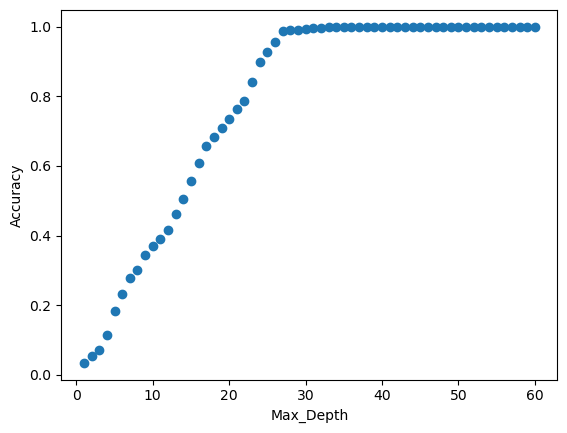

In [31]:
#Printing visual representation of the accuracy values to decide optimal depth
plt.scatter(depth,taccuracy)
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.show()
#The optimal depth decided by the value having lowest and having highest accuracy value

In [32]:
#To decide minimum number of samples to prevent overfitting or underfitting
taccuracy2 = []
min_samples = []

#Cycling through values 2 to 15 since value for minimum samples should be more than 1 (These will be the min_samples_split for the decision tree)
for i in range(2,16): 
    #Setting min_samples_split to i
    dt = tree.DecisionTreeClassifier(min_samples_split = i)
    #Training the model with the data
    dt.fit(x_train_scale,y_train)
    #.score provides the accuracy of the model based on the testing data
    taccuracy2.append(dt.score(x_test_scale, y_test))
    #Adding the min_samples_split to the list
    min_samples.append(i)
print(taccuracy2)

[1.0, 1.0, 1.0, 1.0, 0.9973136333109469, 0.9973136333109469, 0.9952988582941572, 0.9932840832773674, 0.9932840832773674, 0.9932840832773674, 0.9912693082605776, 0.9912693082605776, 0.9912693082605776, 0.9912693082605776]


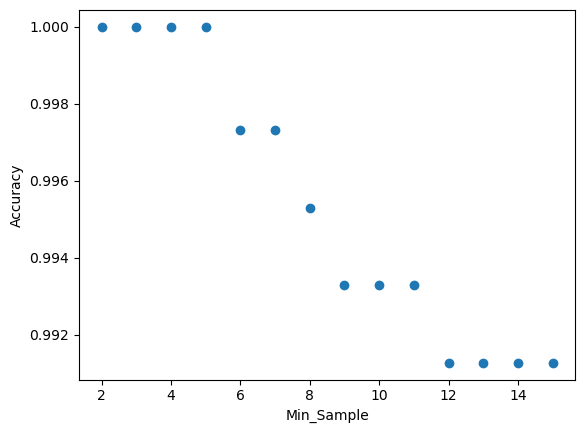

In [33]:
#Printing visual representation of the accuracy values to decide optimal minimum samples
plt.scatter(min_samples,taccuracy2)
plt.xlabel('Min_Sample')
plt.ylabel('Accuracy')
plt.show()
#Values that are too low would be underfitting and too high would be overfitting. Hence, a value in the middle is usually preferable

In [34]:
#Training Decision Tree algorithim with dataset
dt = tree.DecisionTreeClassifier(max_depth = 33, min_samples_split = 5)
dt.fit(x_train_scale, y_train)

DecisionTreeClassifier(max_depth=33, min_samples_split=5)

In [35]:
#Evaluating performance of the model
y_predict2 = dt.predict(x_test_scale)

In [36]:
#Confusion Matrix to evaluate model outputs
print(confusion_matrix(y_test, y_predict2))

[[36  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 38]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

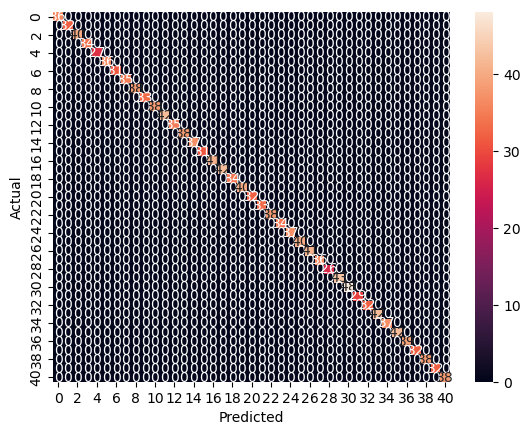

In [37]:
#Confusion Matrix using Heatmap for better understanding
df3 = pd.DataFrame()
df3['Actual'] = y_test
df3['Predicted'] = y_predict2

#Couting frequency in actual and predicted
freq = pd.crosstab(df3.Actual, df3.Predicted)

#Plotting Heatmap
sns.heatmap(freq, annot = True, fmt = 'd')

In [38]:
#Decision Tree Model Accuracy
DTacc = accuracy_score(y_test, y_predict2)
print("Decision Tree Model Accuracy:", DTacc*100)

Decision Tree Model Accuracy: 100.0


In [39]:
a2 = []
p2 = []
for i in df3['Actual']:
    a2.append(d[i])
for j in df3['Predicted']:
    p2.append(d[j])

In [40]:
t = pd.DataFrame(list(zip(a2, p2)))
tcolumns = ['Actual', 'Predicted']

In [41]:
print(tabulate(t, tcolumns, tablefmt = 'fancy_grid'))

╒══════╤═══════════════════════════════════════╤═══════════════════════════════════════╕
│      │ Actual                                │ Predicted                             │
╞══════╪═══════════════════════════════════════╪═══════════════════════════════════════╡
│    0 │ Pneumonia                             │ Pneumonia                             │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    1 │ Hyperthyroidism                       │ Hyperthyroidism                       │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    2 │ Chronic cholestasis                   │ Chronic cholestasis                   │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    3 │ Acne                                  │ Acne                                  │
├──────┼───────────────────────────────────────┼───────────────────────────────────────┤
│    4 │ Alcoholic he

## Neural Networks

- loosely modelled after how neurons in human brain behaves
- they can extact data features automatically without needing the input of the programmer 
- fast and efficient way to solve problems when dataset is very large
- neural netword divided into many layers and each layer further divided into nodes; each node has its own task to accomplish which is then passed to the next layer
    - First layer: Input
        - acquire data and feed it to the neural network
        - no processing occurs in first layer
    - Hidden layer: Processing
        - whole processing occurs in hidden layers
        - hidden; not visible to users
        - each node of hidden layer has its own machine learning algorithms which it executes on the data received from the input layer
        - processed output passed on to the subsequent hidden layer
     - Output Layer:
         - last hidden layer passes the final processed data to the output layer
         - gives user final output
         - no processing occurs in the output layer
         - meant for user-interface

In [42]:
model = Sequential()

#Input: Adding first hidden layer with 121 nodes (input_dim is the number of columns in the input layer, activation refers to how the nodes/neurons are activated)
model.add(Dense(121,input_dim=132,activation='relu'))

#Processing: Adding the hidden layer with 242 nodes
model.add(Dense(242,activation='relu'))

#Output: Adding the output layer with 121 nodes (activation used has to be softmax since we are dealing with categorical outputs or targets)
model.add(Dense(121,activation='softmax'))

#Compiling the model (optimizer refers to method to make the adjustment within the model, loss refers to how the difference between the predicted output)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 121)               16093     
                                                                 
 dense_1 (Dense)             (None, 242)               29524     
                                                                 
 dense_2 (Dense)             (None, 121)               29403     
                                                                 
Total params: 75,020
Trainable params: 75,020
Non-trainable params: 0
_________________________________________________________________


In [44]:
#Training model
# epochs refer to number of times full dataset used to train the model, shuffle tells the model to randomise the arrangement of the dataset after each epoch(if given as Shuffle = True), validation_data allows to input in the test datasets; shows the model accuracy on the test set.
n = model.fit(x_train,y_train,epochs=100,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/100
109/109 [==============================] - 2s 13ms/step - loss: 2.4467 - accuracy: 0.5600 - val_loss: 0.5560 - val_accuracy: 0.9711
Epoch 2/100
109/109 [==============================] - 1s 6ms/step - loss: 0.1694 - accuracy: 0.9980 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 3/100
109/109 [==============================] - 1s 6ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 4/100
109/109 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/100
109/109 [==============================] - 1s 6ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/100
109/109 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/100
109/109 [==============================] - 1s 7ms/step - loss: 8.1448e-04 - accuracy: 1.0000 - val_loss: 5.6300e-04 - val_accurac

109/109 [==============================] - 1s 6ms/step - loss: 8.0618e-07 - accuracy: 1.0000 - val_loss: 7.7922e-07 - val_accuracy: 1.0000
Epoch 56/100
109/109 [==============================] - 1s 6ms/step - loss: 7.4560e-07 - accuracy: 1.0000 - val_loss: 7.3551e-07 - val_accuracy: 1.0000
Epoch 57/100
109/109 [==============================] - 1s 8ms/step - loss: 6.9579e-07 - accuracy: 1.0000 - val_loss: 6.8195e-07 - val_accuracy: 1.0000
Epoch 58/100
109/109 [==============================] - 1s 10ms/step - loss: 6.5124e-07 - accuracy: 1.0000 - val_loss: 6.3647e-07 - val_accuracy: 1.0000
Epoch 59/100
109/109 [==============================] - 1s 7ms/step - loss: 6.1060e-07 - accuracy: 1.0000 - val_loss: 5.9292e-07 - val_accuracy: 1.0000
Epoch 60/100
109/109 [==============================] - 1s 6ms/step - loss: 5.6951e-07 - accuracy: 1.0000 - val_loss: 5.5898e-07 - val_accuracy: 1.0000
Epoch 61/100
109/109 [==============================] - 1s 8ms/step - loss: 5.3526e-07 - accuracy: 1

In [45]:
#Evaluating performance of the model
y_predict3 = model.predict(x_test_scale)

47/47 [==============================] - 0s 2ms/step


In [46]:
#Neural Network Model Accuracy
Nacc = model.evaluate(x_test_scale, y_test)
print("Neural Network Model Accuracy:", Nacc[1]*100)

47/47 [==============================] - 0s 3ms/step - loss: 4.4021 - accuracy: 0.7596
Neural Network Model Accuracy: 75.95701813697815


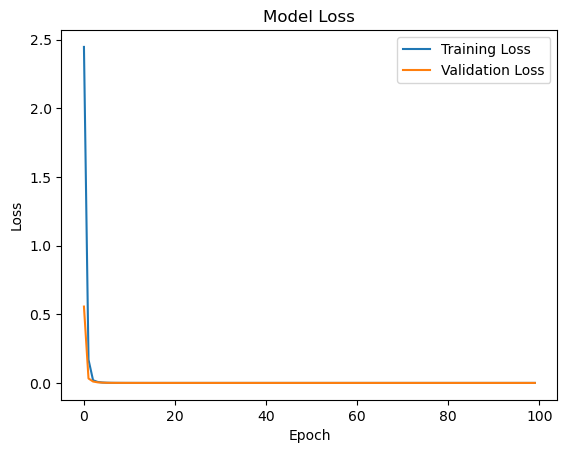

In [47]:
#Model Loss
plt.plot(n.history['loss'])
plt.plot(n.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')
plt.show()

Training loss: 
- assess how a deep learning model fits traning data
- assess error of model in training set
- sum of errors for each example in the training set

Validation loss: 
- assess the performance of deep learning model on validation set
    - validation set: portion of dataset set aside to validate performance of model
- sum of the errors for each example in the validation set

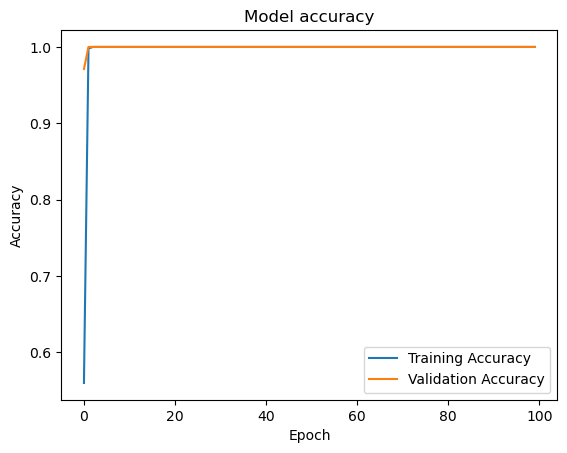

In [48]:
plt.plot(n.history['accuracy'])
plt.plot(n.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

Training accuracy:
- accuracy of a model on the data it was trained on

Validation accuracy:
- accuracy of a model on new data

## Random Forest Regression

- fundamental idea: combine many decision trees into single model

In [50]:
#Training
# random_state controls randomness of the sample (usually 0 or 42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scale, y_train,y_train)

RandomForestRegressor(random_state=42)

In [51]:
#Evaluating performance of the model
y_predict4 = rf_model.predict(x_test_scale)

R-Squared:
- determines proportion of variance in dependenet variable that can be predicted or explained by an independent variable
- shows how well regression model (independent variable) predicts outcome of observed data (dependent variable)

In [52]:
#Random Forest Regression Model Accuracy
RFacc = r2_score(y_test, y_predict4)
print("Random Forest Regression Model Accuracy:", RFacc*100)

Random Forest Regression Model Accuracy: 99.98171308154153


RMSE (Root Men Square Error):
- determines the absolute fit of the model to the data
- indicates how close the actual data points are to the model’s predicted values
- low value of RMSE indicates a better fit

In [53]:
Rrmse = float(np.sqrt(mean_squared_error(y_test, y_predict4)))
print("Random Forest Regression Model RMSE:", Rrmse)

Random Forest Regression Model RMSE: 0.15875734701644245


In [54]:
rpredicted = encoder.inverse_transform(y_predict4.astype(int))
ractual = encoder.inverse_transform(y_test)

In [55]:
f = []
for i in range(len(rpredicted)):
    f.append([ractual[i], rpredicted[i]])

fcolumns = ["Actual", "Predicted"]

print(tabulate(f, fcolumns, tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤══════════════════════════════╕
│ Actual                                  │ Predicted                    │
╞═════════════════════════════════════════╪══════════════════════════════╡
│ AIDS                                    │ AIDS                         │
├─────────────────────────────────────────┼──────────────────────────────┤
│ Migraine                                │ Migraine                     │
├─────────────────────────────────────────┼──────────────────────────────┤
│ Alcoholic hepatitis                     │ Alcoholic hepatitis          │
├─────────────────────────────────────────┼──────────────────────────────┤
│ Chicken pox                             │ Chicken pox                  │
├─────────────────────────────────────────┼──────────────────────────────┤
│ Chronic cholestasis                     │ Chronic cholestasis          │
├─────────────────────────────────────────┼──────────────────────────────┤
│ Hyperthyroidism        

## Linear Regression

- predicts the value of unknown data by using another related and known data value

In [56]:
#Training
reg = LinearRegression()
reg.fit(x_train_scale,y_train)

LinearRegression()

In [57]:
#Evaluating performance of the model
y_predict5 = reg.predict(x_test_scale)

In [58]:
#Linear Regression Model Accuracy
LRacc = r2_score(y_test, y_predict5)
print("Linear Regression Model Accuracy:", LRacc*100)

Linear Regression Model Accuracy: 100.0


In [59]:
Lrmse = float(np.sqrt(mean_squared_error(y_test, y_predict5)))
print("Linear Regression Model RMSE:", Lrmse)

Linear Regression Model RMSE: 2.186054330856792e-14


In [60]:
lpredicted = encoder.inverse_transform(y_predict5.astype(int))
lactual = encoder.inverse_transform(y_test)

In [61]:
l = []
for i in range(len(lpredicted)):
    l.append([lactual[i], lpredicted[i]])

lcolumns = ["Actual", "Predicted"]

print(tabulate(l, lcolumns, tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤═════════════════════════════════════════╕
│ Actual                                  │ Predicted                               │
╞═════════════════════════════════════════╪═════════════════════════════════════════╡
│ AIDS                                    │ AIDS                                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Migraine                                │ Malaria                                 │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Alcoholic hepatitis                     │ Alcoholic hepatitis                     │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chicken pox                             │ Cervical spondylosis                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chronic cholestasis                     │ Chronic ch

## Logistic Regression

- used for classification and predictive analytics 
- estimates the probability of an event occurring based on a given dataset of independent variables.
- used when the dependent variable is categorical.

In [62]:
#Training
lr = LogisticRegression()
lr.fit(x_train_scale,y_train)

LogisticRegression()

In [63]:
#Evaluating performance of the model
y_predict6 = lr.predict(x_test_scale)

In [64]:
#Linear Regression Model Accuracy
LR2acc = r2_score(y_test, y_predict6)
print("Logistic Regression Model Accuracy:", LR2acc*100)

Logistic Regression Model Accuracy: 100.0


In [65]:
L2rmse = float(np.sqrt(mean_squared_error(y_test, y_predict6)))
print("Logistic Regression Model RMSE:", L2rmse)

Logistic Regression Model RMSE: 0.0


In [66]:
lrpredicted = encoder.inverse_transform(y_predict6.astype(int))
lractual = encoder.inverse_transform(y_test)

In [67]:
lr = []
for i in range(len(lrpredicted)):
    lr.append([lractual[i], lrpredicted[i]])

lrcolumns = ["Actual", "Predicted"]

print(tabulate(lr, lrcolumns, tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤═════════════════════════════════════════╕
│ Actual                                  │ Predicted                               │
╞═════════════════════════════════════════╪═════════════════════════════════════════╡
│ AIDS                                    │ AIDS                                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Migraine                                │ Migraine                                │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Alcoholic hepatitis                     │ Alcoholic hepatitis                     │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chicken pox                             │ Chicken pox                             │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chronic cholestasis                     │ Chronic ch